In [146]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Generation
def my_func(x):
    return np.exp(-np.sin(x**2)/2) + x

# 25 samples in [-10, 10]
X = np.linspace(-10, 10, 25).reshape(-1, 1)
y = my_func(X)

# Split into train (20) and test (5)
indices = np.arange(25)
np.random.shuffle(indices)
train_idx, test_idx = indices[:20], indices[20:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]


In [154]:
# 2. Activation function tanh
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu(z):
    return max(0, z)

def relu_derivative(z):
    return float(z > 0)



def activation(z, activation_type="tanh"):
    if activation_type == "tanh":
        return tanh(z)
    elif activation_type == "relu":
        return relu(z)
    else:
        raise ValueError("Invalid activation type")

def activation_derivative(z, activation_type='tanh'):
    if activation_type == "tanh":
        return tanh_derivative(z)
    elif activation_type == "relu":
        return relu_derivative(z)
    else:
        raise ValueError("Invalid activation type")
    return z


In [155]:
# 3. Initialize parameters
rng = np.random.default_rng(42)
w1, b1 = rng.normal(0, 0.1), rng.normal(0, 0.1)
w2, b2 = rng.normal(0, 0.1), rng.normal(0, 0.1)
w3, b3 = rng.normal(0, 0.1), rng.normal(0, 0.1)



In [156]:
# 4. Training Loop
lr = 0.0001
epochs = 5000

train_losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for xi, yi in zip(X_train, y_train):
        x = xi.item()
        y_true = yi.item()

        # Forward pass
        z1 = w1 * x + b1
        a1 = activation(z1)

        z2 = w2 * a1 + b2
        a2 = activation(z2)

        z3 = w3 * a2 + b3
        y_pred = activation(z3)

        # Loss (MSE)
        loss = (y_pred - y_true) ** 2
        epoch_loss += loss

        # Backward pass
        dL_dy = 2 * (y_pred - y_true)

        dy_dz3 = activation_derivative(z3)
        dz3_dw3 = a2
        dz3_db3 = 1
        dz3_da2 = w3

        dL_dw3 = dL_dy * dy_dz3 * dz3_dw3
        dL_db3 = dL_dy * dy_dz3 * dz3_db3

        dL_da2 = dL_dy * dy_dz3 * dz3_da2
        da2_dz2 = activation_derivative(z2)
        dz2_dw2 = a1
        dz2_db2 = 1
        dz2_da1 = w2

        dL_dw2 = dL_da2 * da2_dz2 * dz2_dw2
        dL_db2 = dL_da2 * da2_dz2 * dz2_db2

        dL_da1 = dL_da2 * da2_dz2 * dz2_da1
        da1_dz1 = activation_derivative(z1)
        dz1_dw1 = x
        dz1_db1 = 1

        dL_dw1 = dL_da1 * da1_dz1 * dz1_dw1
        dL_db1 = dL_da1 * da1_dz1 * dz1_db1

        # Parameter update
        w3 -= lr * dL_dw3
        b3 -= lr * dL_db3
        w2 -= lr * dL_dw2
        b2 -= lr * dL_db2
        w1 -= lr * dL_dw1
        b1 -= lr * dL_db1

    train_losses.append(epoch_loss / len(X_train))


In [157]:
# 5. Evaluation
def predict(X):
    preds = []
    for xi in X:
        x = xi.item()
        z1 = w1 * x + b1
        a1 = activation(z1)
        z2 = w2 * a1 + b2
        a2 = activation(z2)
        z3 = w3 * a2 + b3
        y_pred = activation(z3)
        preds.append(y_pred)
    return np.array(preds).reshape(-1, 1)


In [158]:
y_train_pred = predict(X_train)
y_test_pred = predict(X_test)

train_mse = np.mean((y_train_pred - y_train) ** 2)
test_mse = np.mean((y_test_pred - y_test) ** 2)


In [159]:
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 25.4755
Test MSE: 37.1415


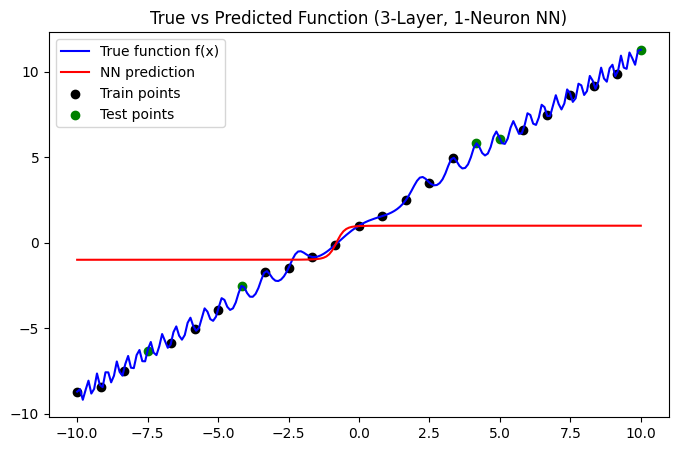

In [160]:
# 6. Plot Results
X_plot = np.linspace(-10, 10, 200).reshape(-1, 1)
y_true_plot = my_func(X_plot)
y_pred_plot = predict(X_plot)

plt.figure(figsize=(8,5))
plt.plot(X_plot, y_true_plot, label="True function f(x)", color="blue")
plt.plot(X_plot, y_pred_plot, label="NN prediction", color="red")
plt.scatter(X_train, y_train, color="black", label="Train points")
plt.scatter(X_test, y_test, color="green", label="Test points")
plt.legend()
plt.title("True vs Predicted Function (3-Layer, 1-Neuron NN)")
plt.show()

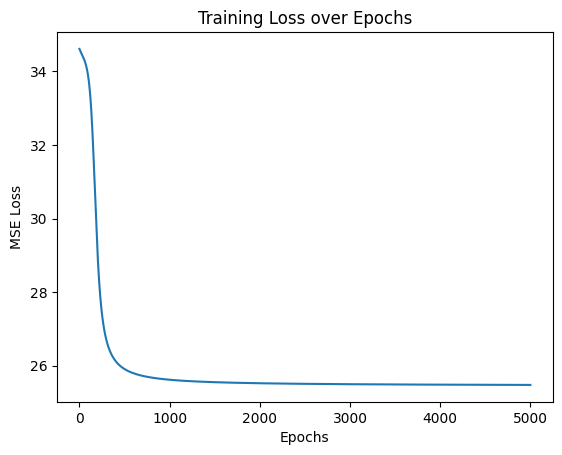

In [161]:
plt.plot(train_losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()